<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2024-25

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 12th DECEMBER @ 14:00**. 

In [71]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Part - 1 /packet-capture3.csv')
    return data
data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

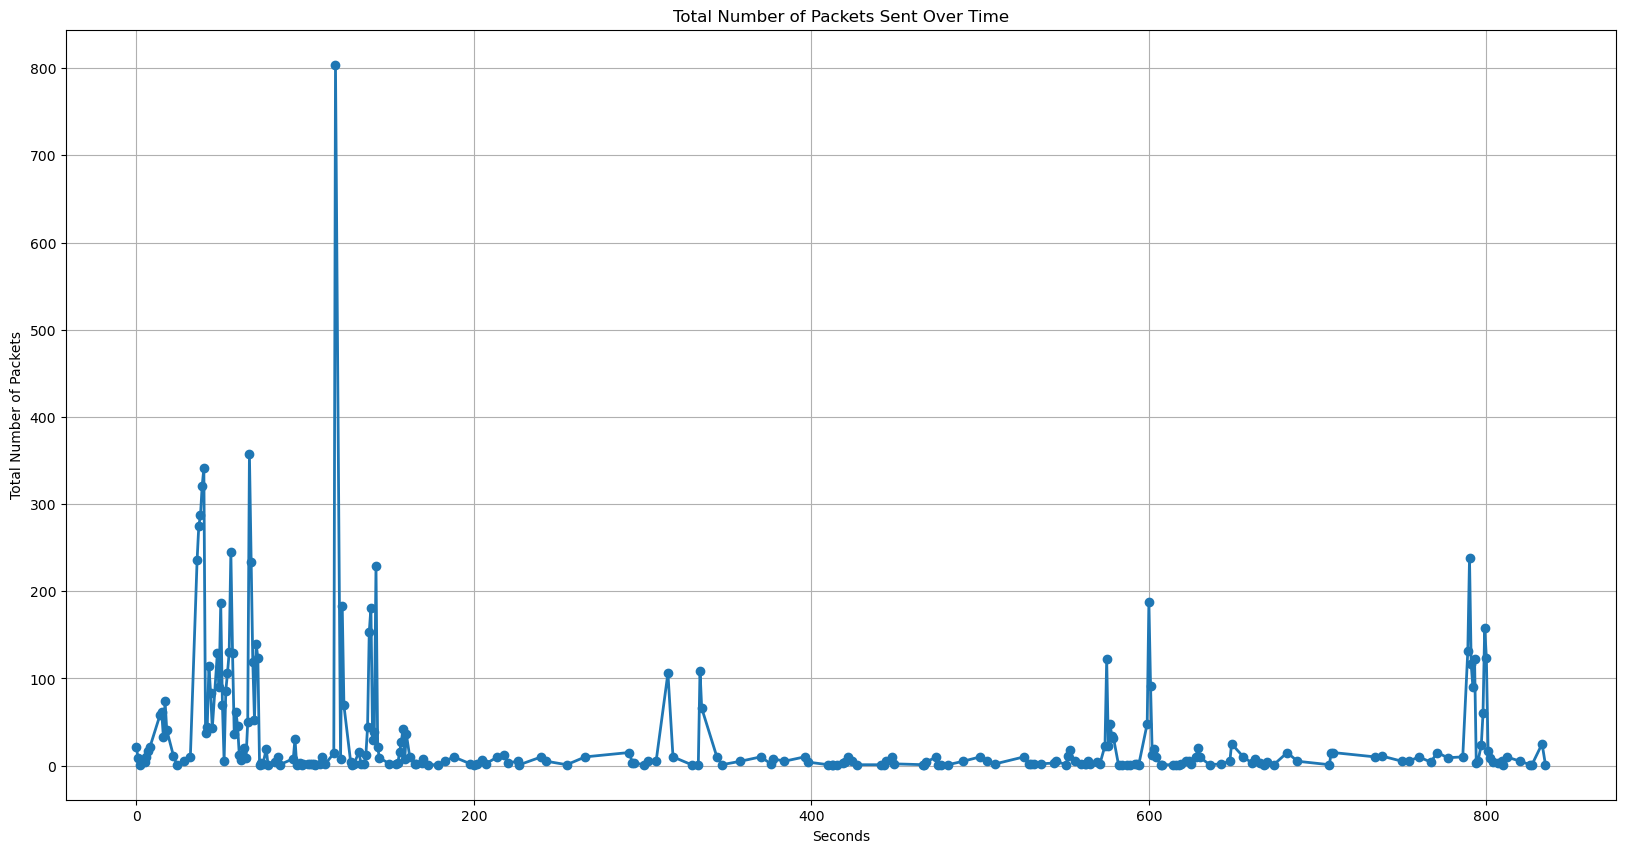

In [6]:
# ANSWER

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##########    NEW ANSWER   ############



# Step 1: Extract seconds from the time column 

data['Seconds'] = np.floor(data['Time']).astype(int) 

  

# Step 2: Aggregate data by seconds 

packets_per_second = data.groupby('Seconds')['Time'].count().reset_index() 

packets_per_second.columns = ['Seconds', 'Total Packets'] 

  

# Step 3: Plot the line chart 

plt.figure(figsize=(20, 10)) 

plt.plot(packets_per_second['Seconds'], packets_per_second['Total Packets'], marker='o', linestyle='-', linewidth=2) 

plt.xlabel('Seconds') 

plt.ylabel('Total Number of Packets') 

plt.title('Total Number of Packets Sent Over Time') 

plt.grid(True) 

plt.show() 




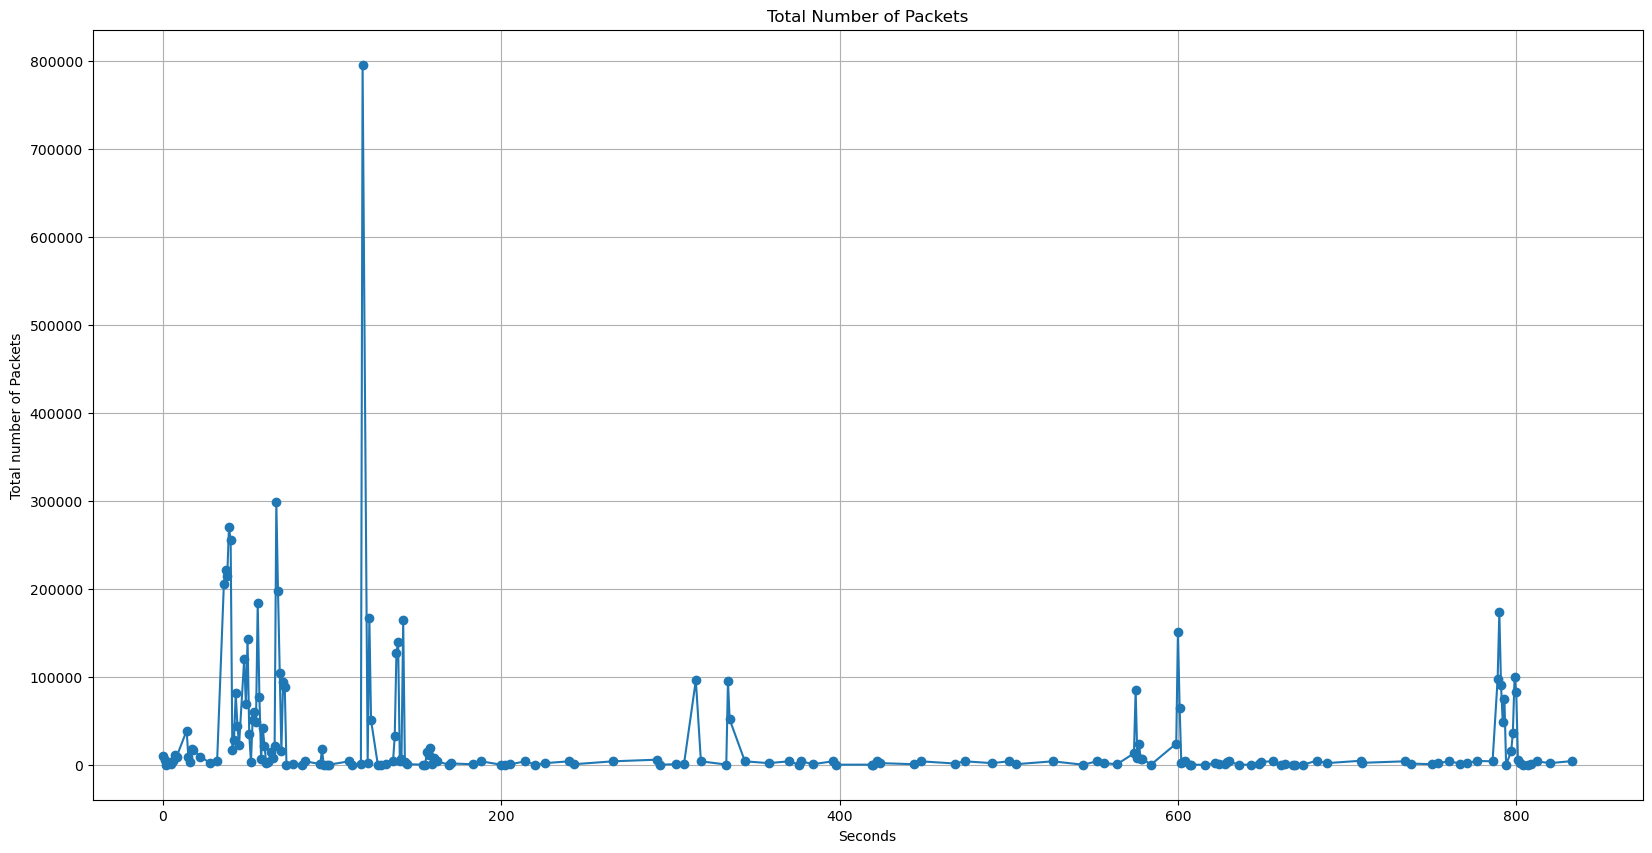

In [111]:

#Convert time to whole seconds
#Use astype(int) to round down milliseconds to whole seconds
data['Whole_Seconds'] = data['Time'].astype(int)


#Group by 'Whole_seconds' and calculate the total packets  using groupby()
#using sum() to aggregate the total packet count for each group
grouped_data = data.groupby('Whole_Seconds')['Length'].sum().reset_index()


#Plot the line chart 
plt.figure(figsize =(20,10))
plt.plot(grouped_data['Whole_Seconds'], grouped_data['Length'], marker = 'o')    #line chart with markers
plt.xlabel('Seconds')    #X axis lable 
plt.ylabel('Total number of Packets')   # y - axis label
plt.title('Total Number of Packets')        
plt.grid(True)  #adding gridlines for better readability 
plt.show()   # display the show 



### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

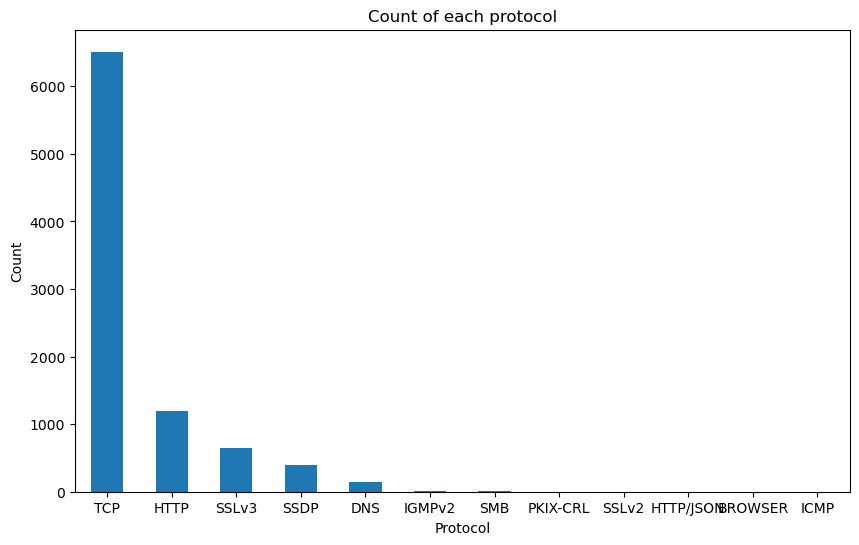

In [77]:
# # ANSWER
# ######### ADD YOUR CODE HERE ##########


# Count the occurrrences of each protocol ( occurrence of each unique value in Protocol) using value_count()
protocol_counts =data["Protocol"].value_counts()     

#Create bar chart
protocol_counts.plot(kind='bar',figsize = (10,6)) 
plt.xlabel("Protocol")    # x axis -label 
plt.ylabel("Count")   # y axis - lable 
plt.title ("Count of each protocol")    # chart title 
plt.xticks(rotation=360) # rotate x-axis labels for better readability
plt.show()


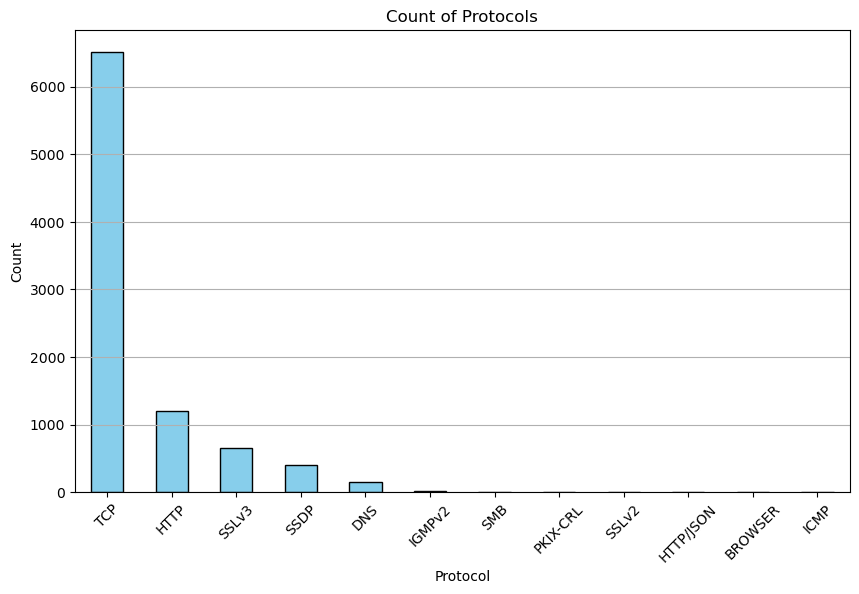

In [79]:
####### NEW ANSWER #########

# Step 1: Count occurrences of each protocol 

protocol_counts = data['Protocol'].value_counts() 

  

# Step 2: Plot the bar chart 

plt.figure(figsize=(10, 6))  # Set figure size 

protocol_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Create bar chart 

plt.xlabel('Protocol')  # Label x-axis 

plt.ylabel('Count')  # Label y-axis 

plt.title('Count of Protocols')  # Add a title 

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability 

plt.grid(axis='y')  # Add horizontal gridlines for clarity 

plt.show() 

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

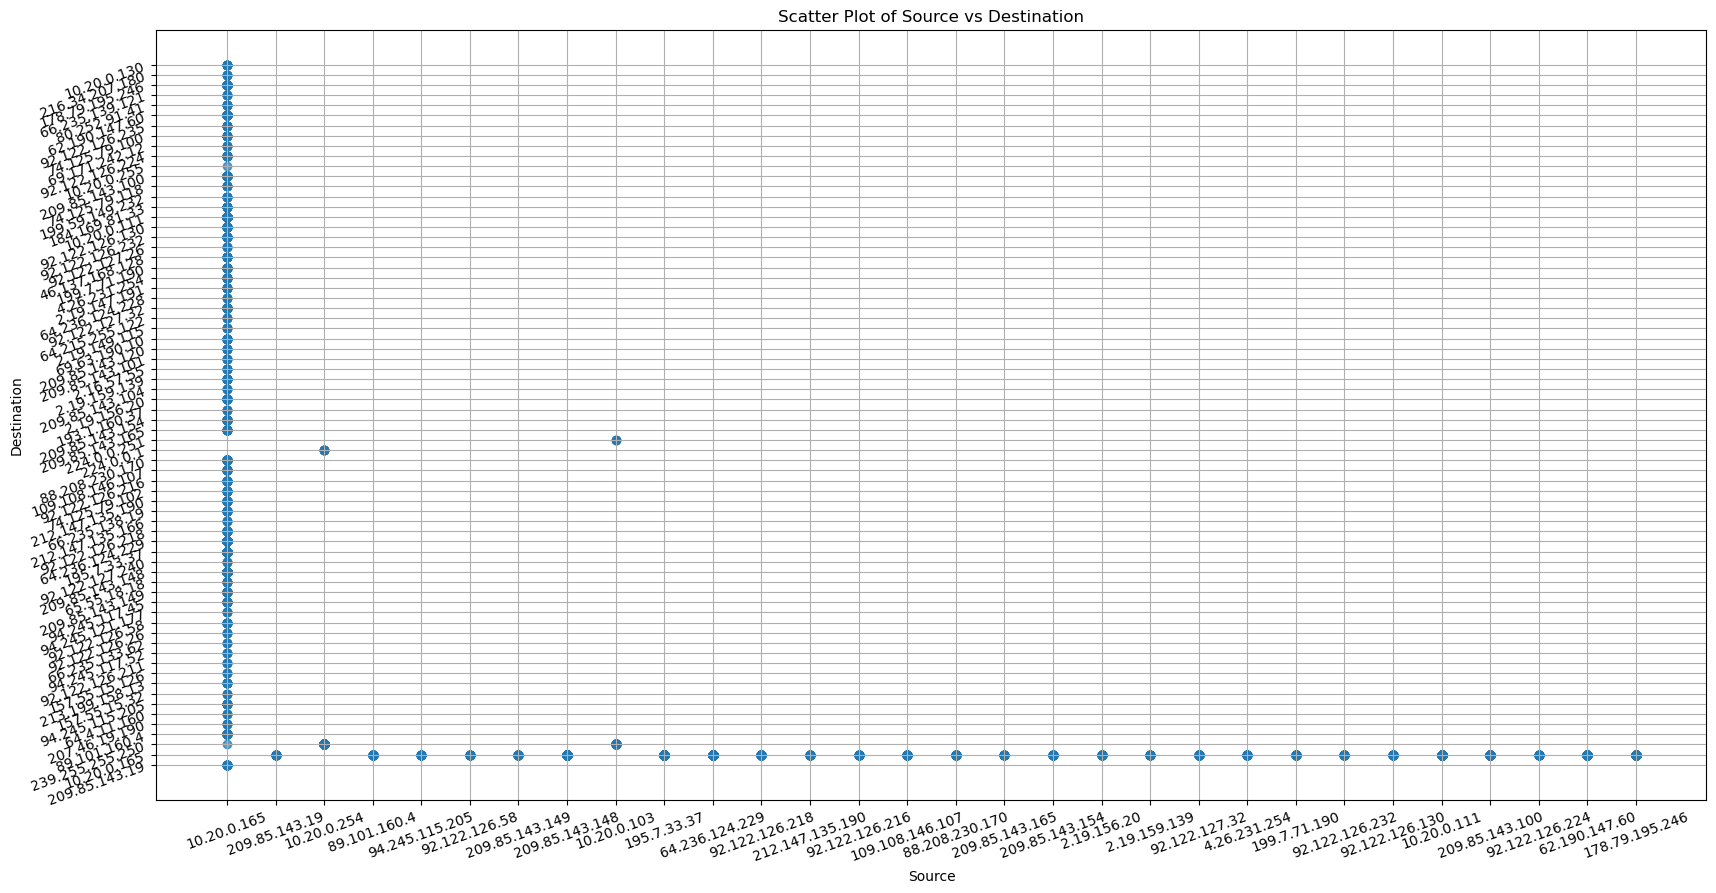

In [91]:
# ANSWER
# dataset already uploaded 

# Extract the columns 'Source' and 'Destination' for plotting 
x = data['Source']
y = data ['Destination']



# Create the scatter plot 
plt.figure(figsize= (20,10))    # set figure size    
plt.scatter(x,y, alpha = 0.7)   # scatter plot with transparency for visibility 
plt.xlabel("Source")
plt.ylabel("Destination")
plt.title("Scatter Plot of Source vs Destination")
plt.xticks(rotation=20)
plt.yticks(rotation=20)

plt.grid(True)     #gridlines for better readability
plt.show()


<Figure size 2000x1000 with 0 Axes>

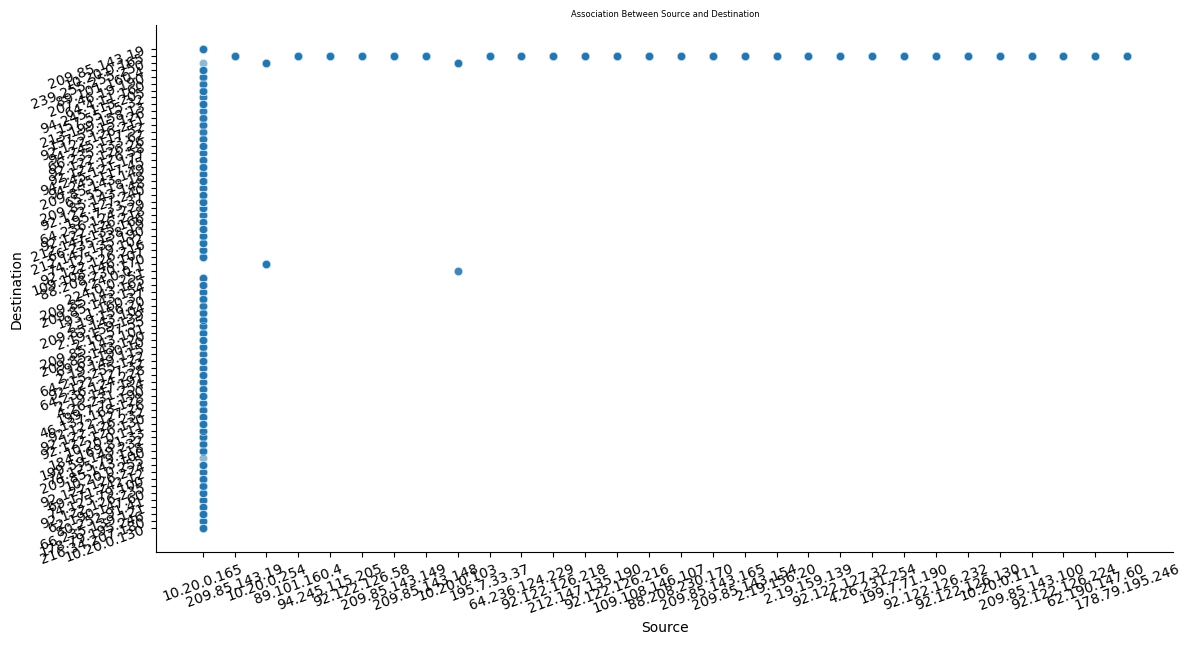

In [113]:
###### NEW ANSWER  USING SEABORN ####

# Import seaborn (if not already imported) 

import seaborn as sns 

  

# Step 1: Prepare data 

x = data['Source'] 

y = data['Destination'] 

  

# Step 2: Create scatter plot using seaborn 

plt.figure(figsize=(20, 10))  # Set figure size for better readability 

sns.relplot(x="Source", y="Destination", data=data, height=6, aspect=2, alpha=0.5)  # Relational plot with customization 

  

# Step 3: Customize chart 

plt.title('Association Between Source and Destination', fontsize=6)  # Add title 

plt.xticks(rotation=20)  # Rotate x-axis labels 

plt.yticks(rotation=20)  # Rotate y-axis labels 

  

# Step 4: Display the chart 

plt.show() 



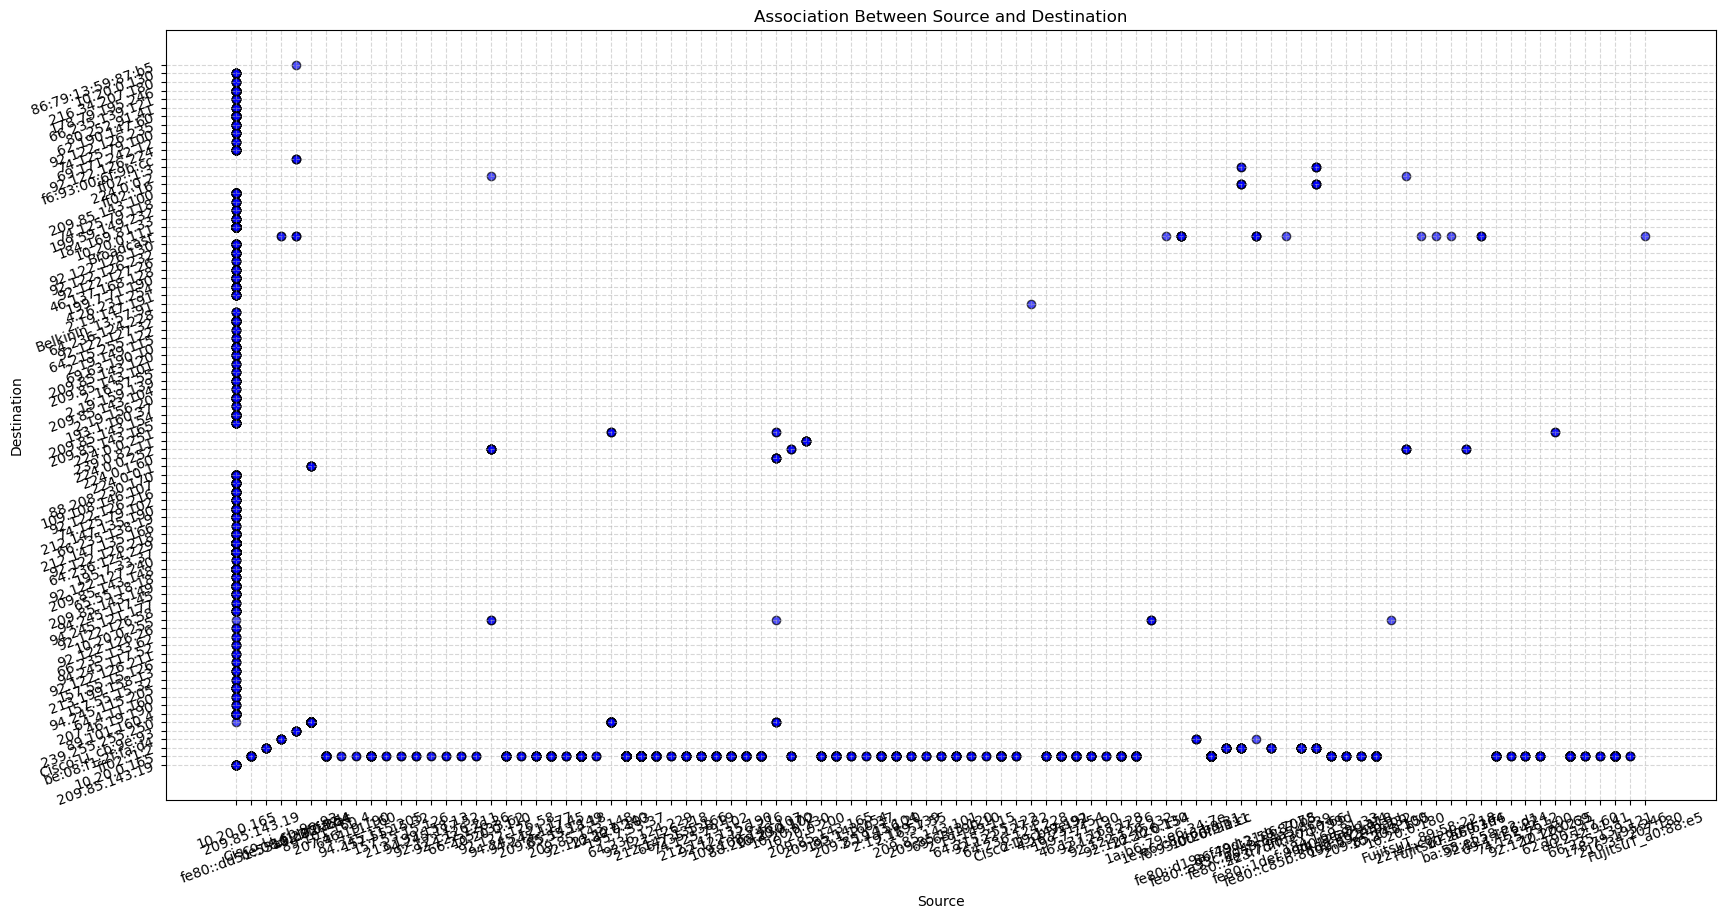

In [43]:
#####NEw answer ###
# Step 1: Prepare data 

x = data['Source'] 

y = data['Destination'] 

  

# Step 2: Create scatter plot 

plt.figure(figsize=(20, 10))  # Set figure size 

plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')  # Scatter plot with transparency and edge color 

plt.xticks(rotation=20)  # Rotate x-axis labels 

plt.yticks(rotation=20)  # Rotate y-axis labels 

  

# Step 3: Customize chart 

plt.xlabel('Source')  # Label x-axis 

plt.ylabel('Destination')  # Label y-axis 

plt.title('Association Between Source and Destination')  # Add chart title 

plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better visualization 

  

# Step 4: Display the chart 

plt.show() 


<Figure size 2000x1000 with 0 Axes>

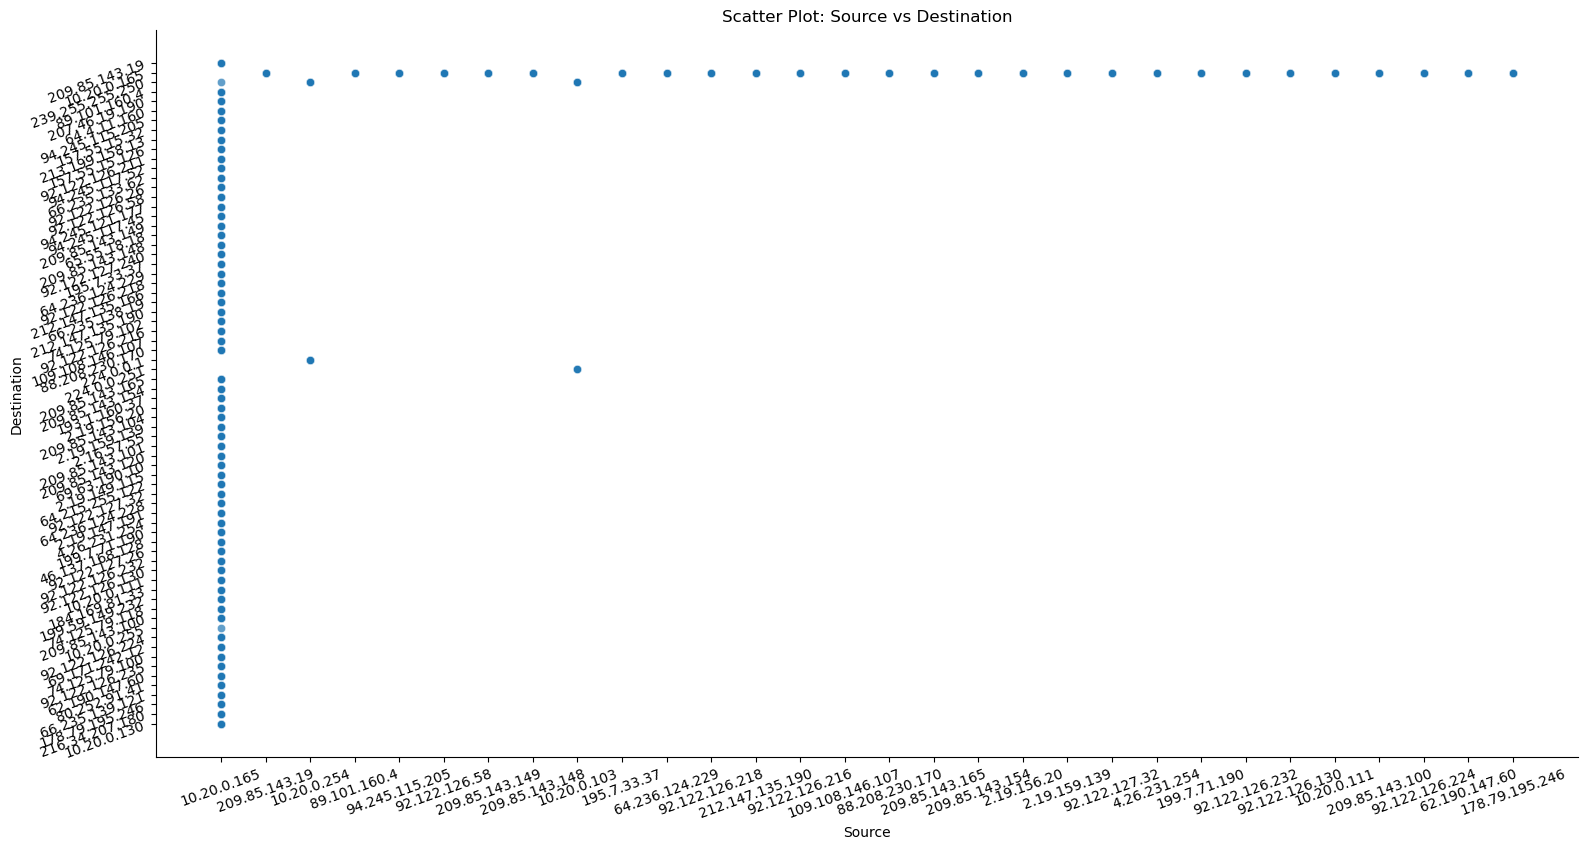

In [95]:

#########scatter plot #####3



import seaborn as sns 

import matplotlib.pyplot as plt 

  

# Create the scatter plot using seaborn's relplot 

plt.figure(figsize=(20, 10))  # Set figure size for better clarity 

sns.relplot( 

    x="Source",  

    y="Destination",  

    data=data,  

    height=8,  

    aspect=2,  

    alpha=0.7  # Adjust transparency to handle overlapping points 

) 

  
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)

# Add labels and title 

plt.xlabel('Source') 

plt.ylabel('Destination') 

plt.title('Scatter Plot: Source vs Destination') 

  

plt.show() 

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

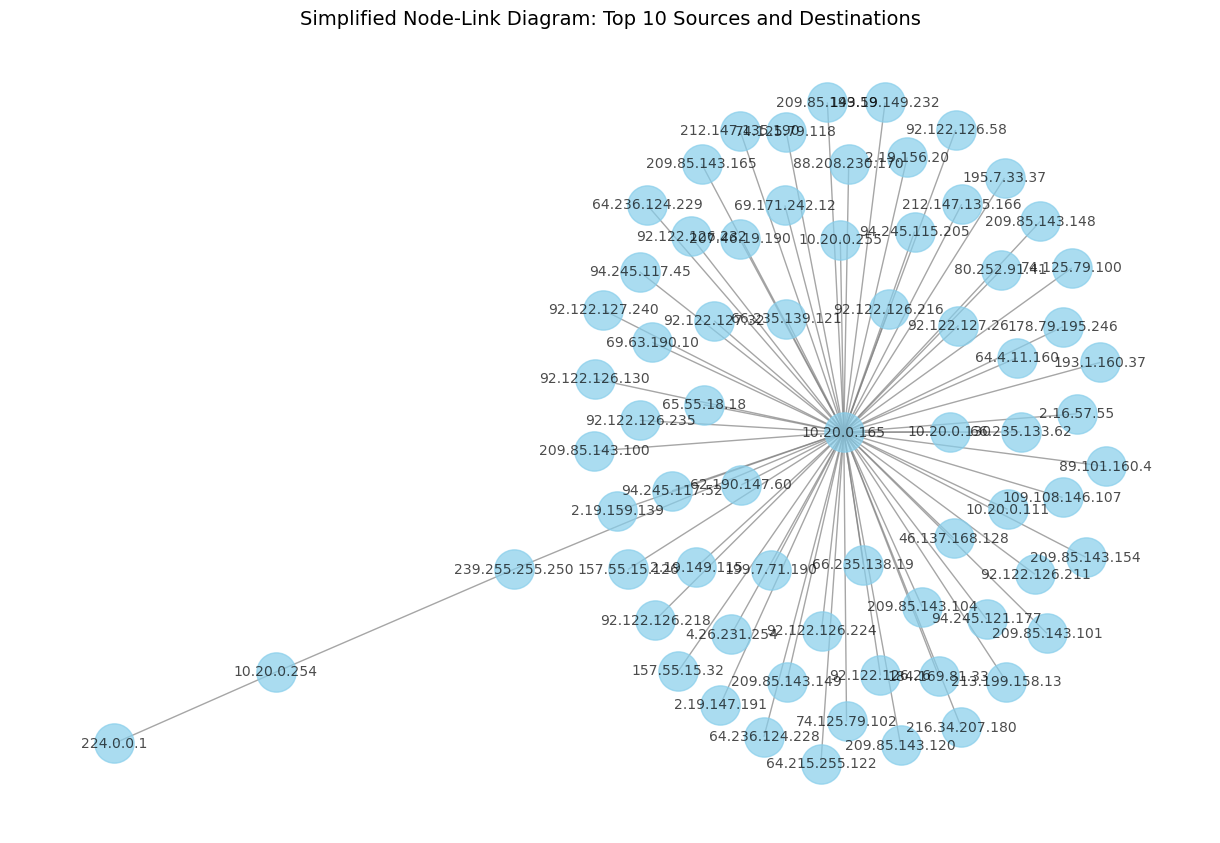

In [59]:
#### New code with filtering only showing high occurrence ######



import pandas as pd 

import networkx as nx 

import matplotlib.pyplot as plt 

  

# Step 1: Filter for top connections 

top_sources = data['Source'].value_counts().head(10).index  # Top 10 sources 

filtered_data = data[data['Source'].isin(top_sources)]  # Filter dataset 

  

# Step 2: Build your graph 

G = nx.from_pandas_edgelist(filtered_data, 'Source', 'Destination') 

  

# Step 3: Create a 2D layout for simplicity 

pos = nx.spring_layout(G)  # Use 2D layout for better readability 

  

# Step 4: Visualize the graph 

plt.figure(figsize=(12, 8))  # Adjust figure size 

nx.draw( 

    G, 

    pos, 

    with_labels=True, 

    node_size=800, 

    node_color="skyblue", 

    edge_color="gray", 

    font_size=10, 

    alpha=0.7, 

) 

plt.title('Simplified Node-Link Diagram: Top 10 Sources and Destinations', fontsize=14) 

plt.show() 





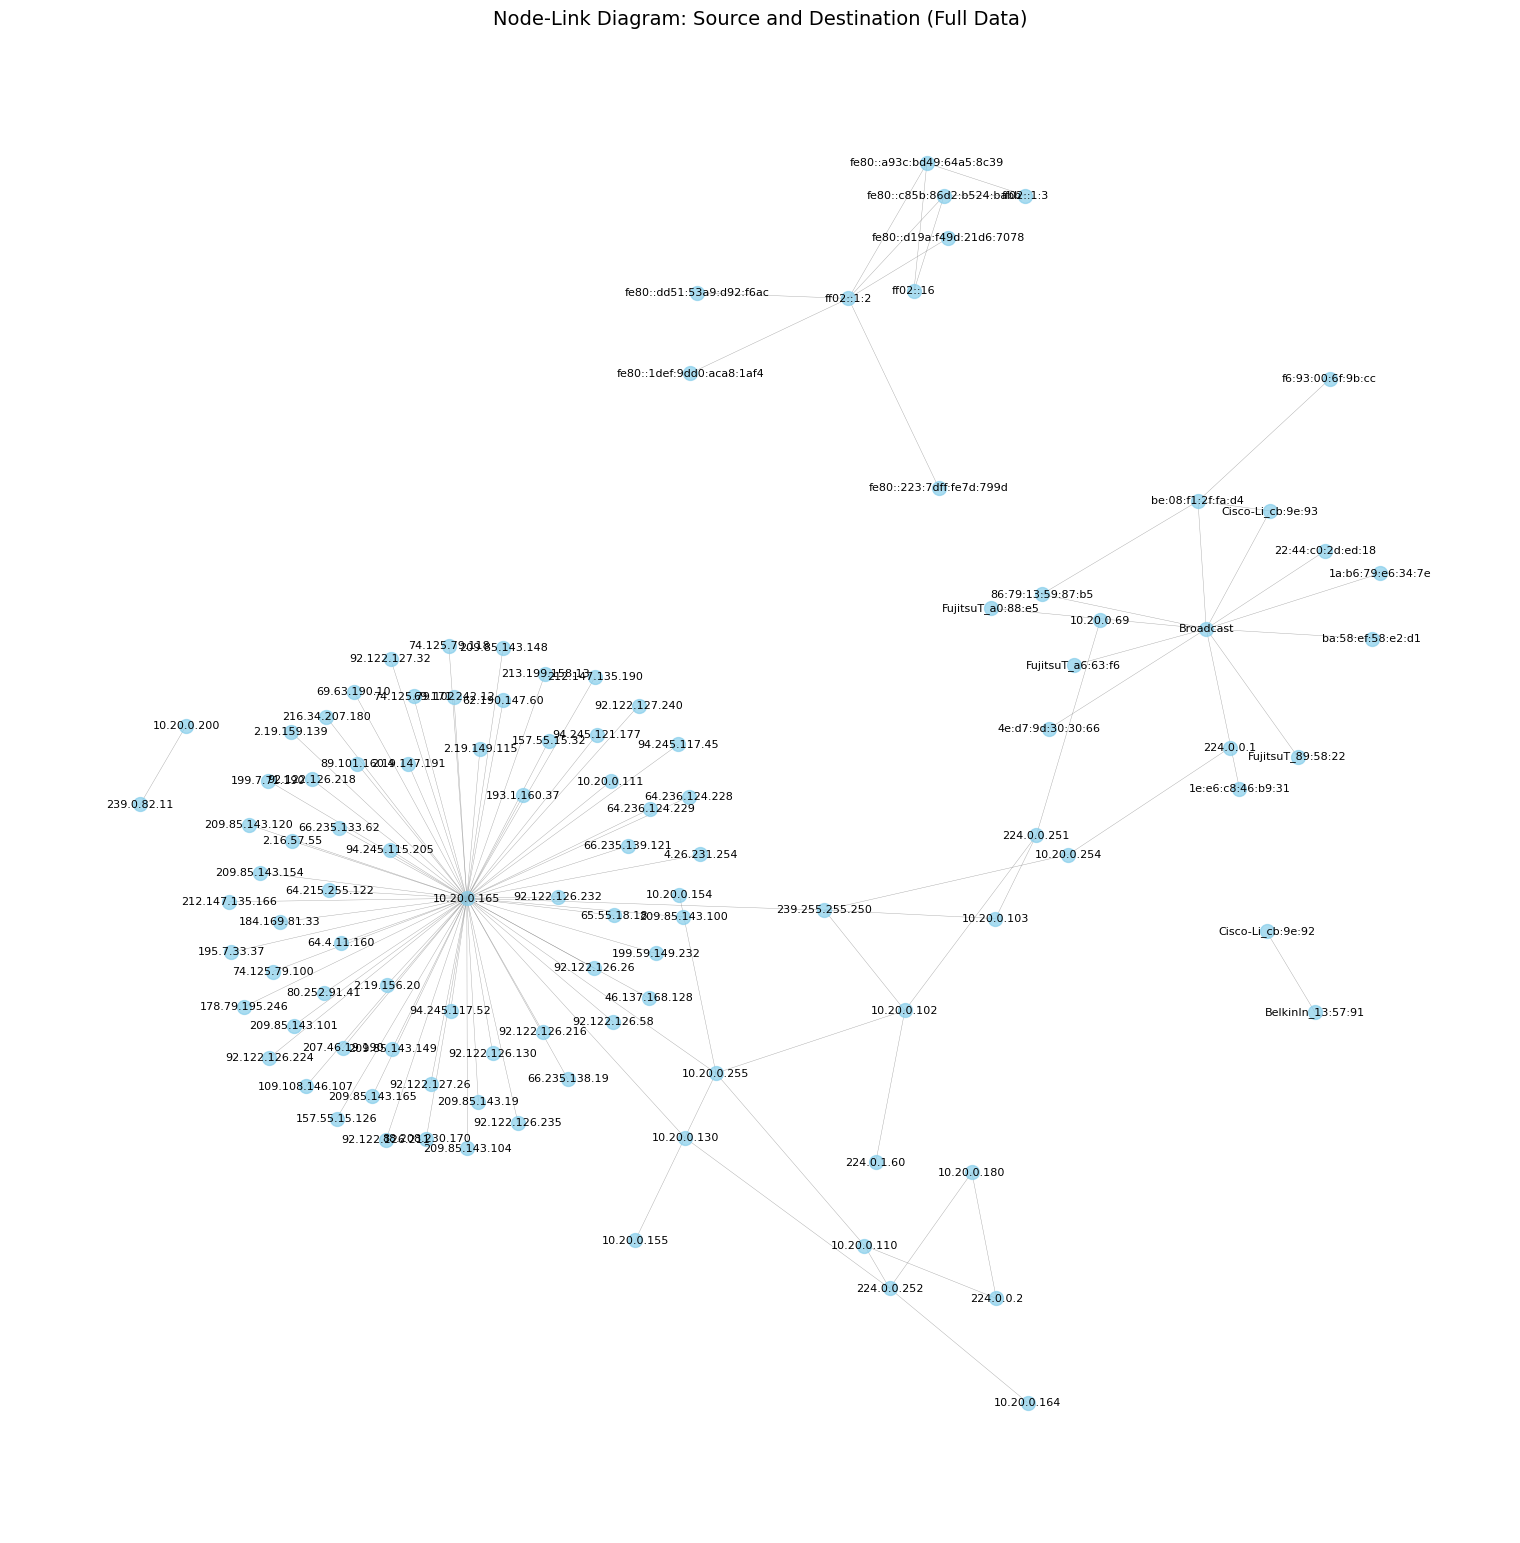

In [55]:
###### Adjusted Layout #######
import pandas as pd 

import networkx as nx 

import matplotlib.pyplot as plt 

  

# Step 1: Build the graph 

G = nx.from_pandas_edgelist(data, 'Source', 'Destination') 

  

# Step 2: Create a layout with increased spacing 

pos = nx.spring_layout(G, k=0.5, iterations=100)  # Increase 'k' to spread nodes further apart 

  

# Step 3: Visualize the graph 

plt.figure(figsize=(15, 15))  # Larger figure size for better readability 

nx.draw( 

    G, 

    pos, 

    with_labels=False,  # Optionally hide labels to reduce clutter 

    node_size=100,  # Reduce node size 

    node_color="skyblue", 

    edge_color="gray", 

    width=0.3,  # Thinner edges 

    alpha=0.7,  # Add transparency to reduce visual noise 

) 

  

# Optional: Add labels separately for better placement 

for node, (x, y) in pos.items(): 

    plt.text( 

        x, y, str(node), fontsize=8, color="black", ha="center", va="center" 

    ) 

  

plt.title('Node-Link Diagram: Source and Destination (Full Data)', fontsize=14) 

plt.show() 



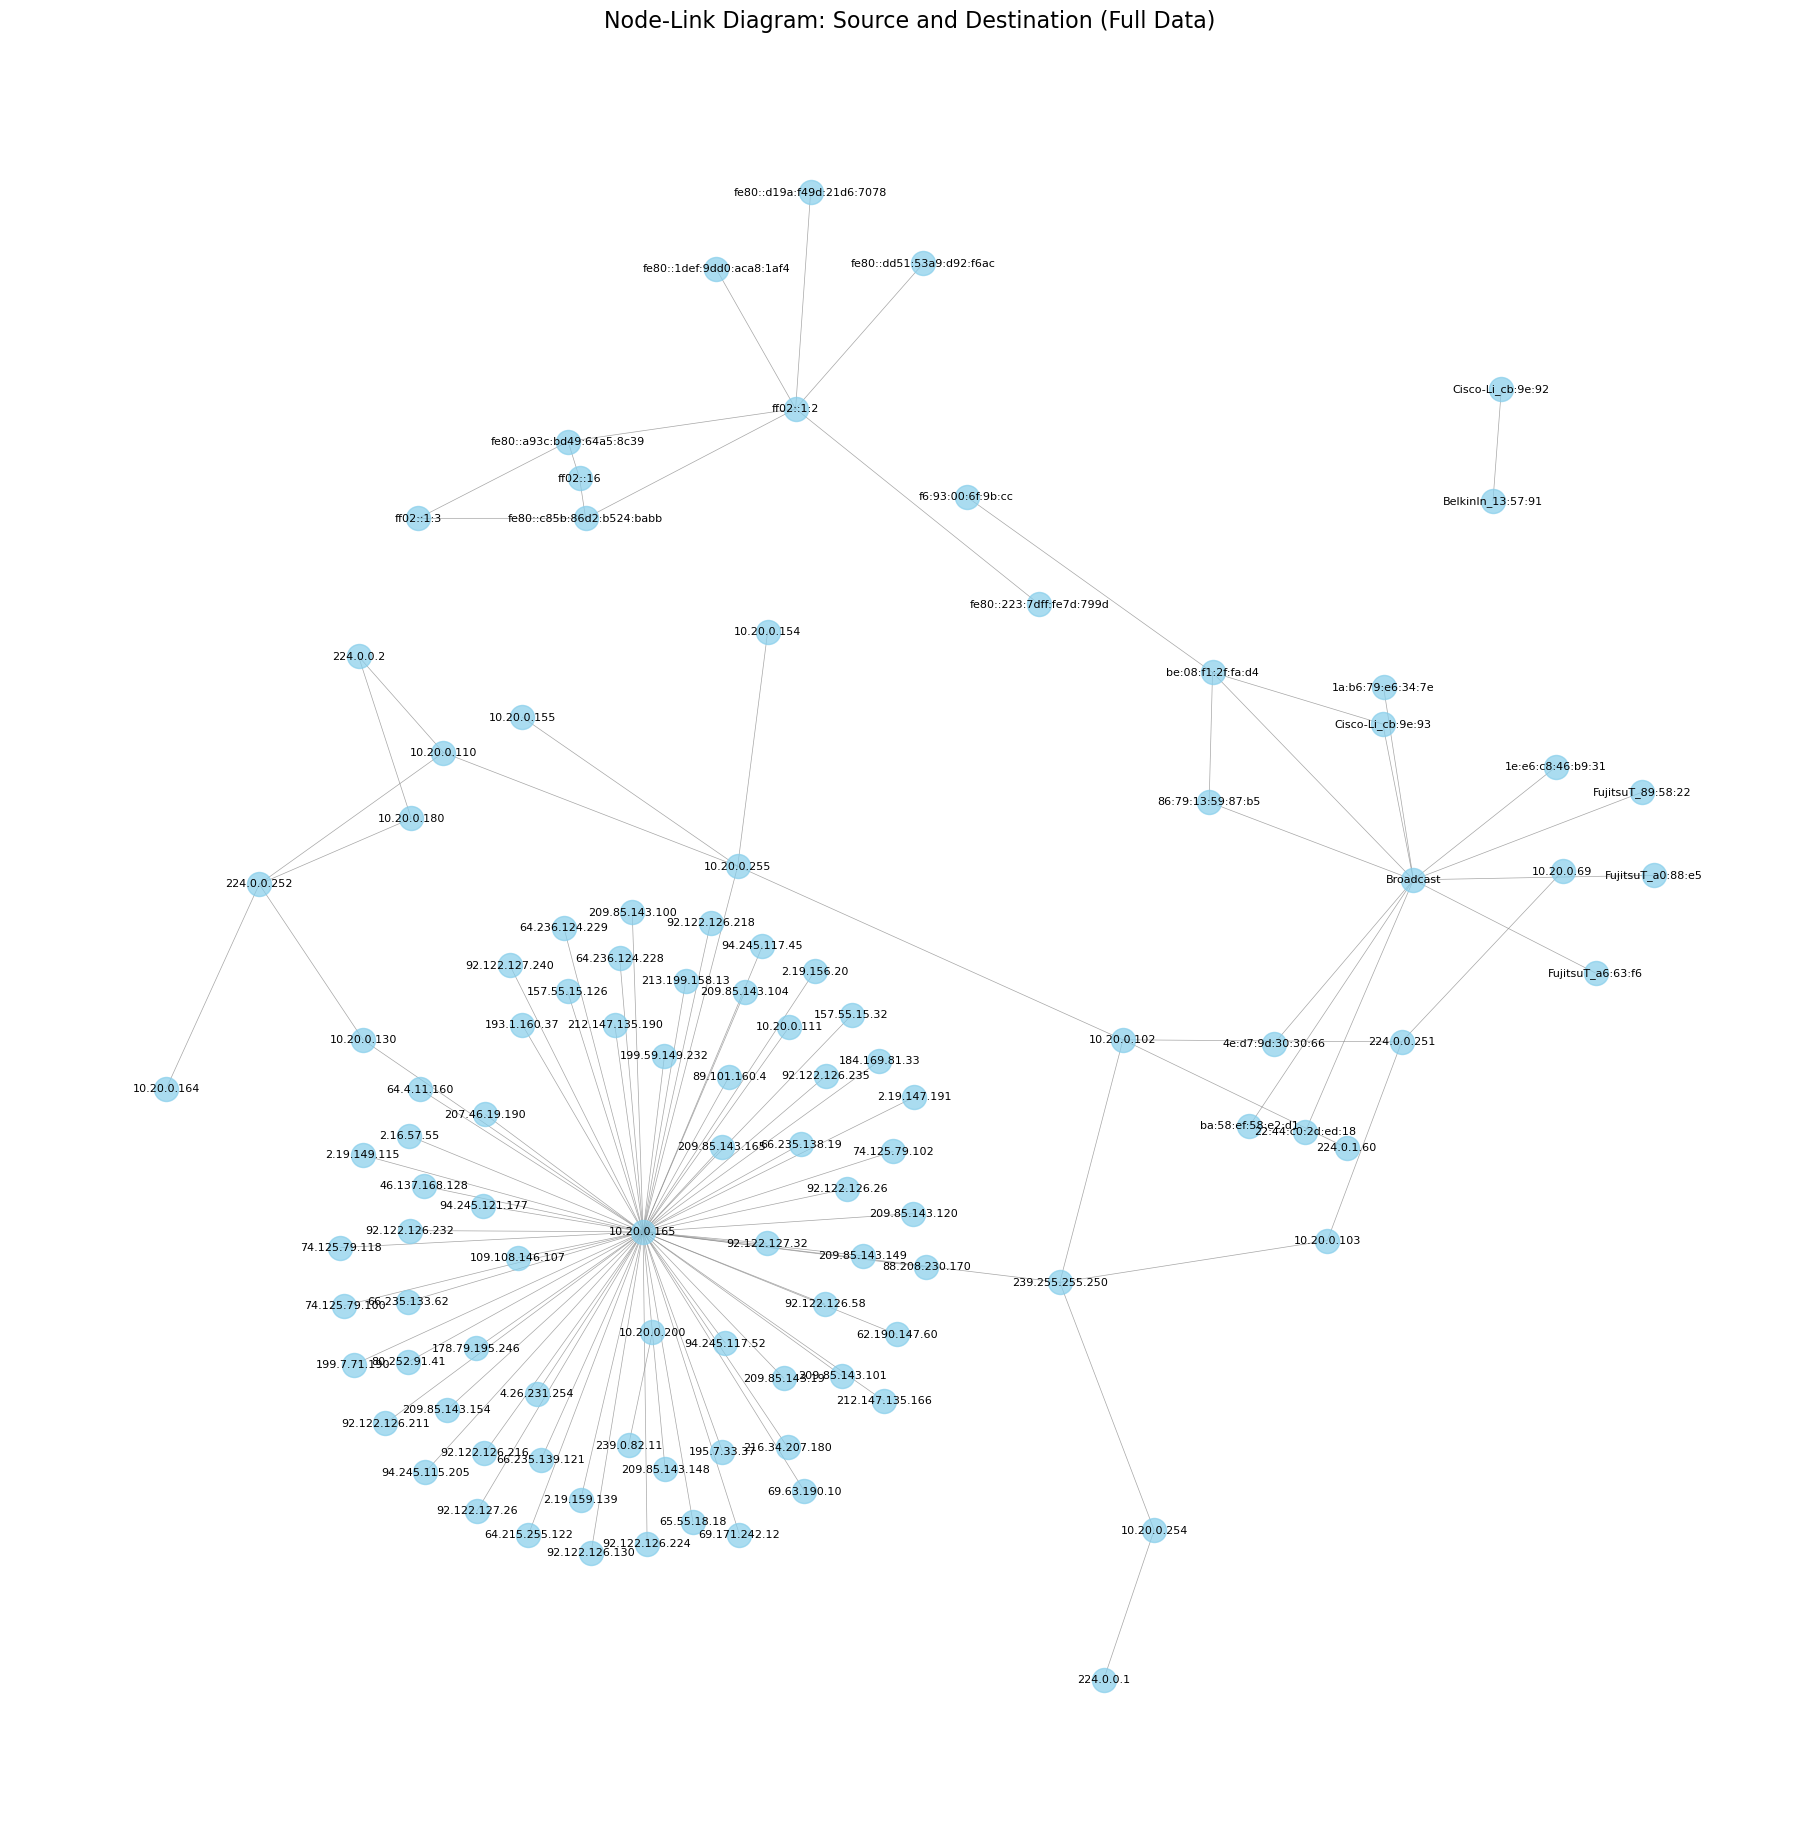

In [51]:
########NO filtering ######## 

import pandas as pd 

import networkx as nx 

import matplotlib.pyplot as plt 

  

# Step 1: Build the graph 

G = nx.from_pandas_edgelist(data, 'Source', 'Destination') 

  

# Step 2: Create a layout with increased spacing 

pos = nx.spring_layout(G, k=1, iterations=200)  # Adjust 'k' for more spacing, increase iterations for better layout 

  

# Step 3: Visualize the graph 

plt.figure(figsize=(18, 18))  # Larger figure size for better visualization 

nx.draw( 

    G, 

    pos, 

    with_labels=False,  # Hide labels for initial clarity 

    node_size=300,  # Adjust node size to balance visibility 

    node_color="skyblue", 

    edge_color="gray", 

    width=0.5,  # Adjust edge thickness 

    alpha=0.7,  # Transparency for overlapping edges 

) 

  

# Optional: Add labels separately for better placement 

for node, (x, y) in pos.items(): 

    plt.text( 

        x, y, str(node), fontsize=8, color="black", ha="center", va="center" 

    ) 

  

plt.title('Node-Link Diagram: Source and Destination (Full Data)', fontsize=16) 

plt.show() 


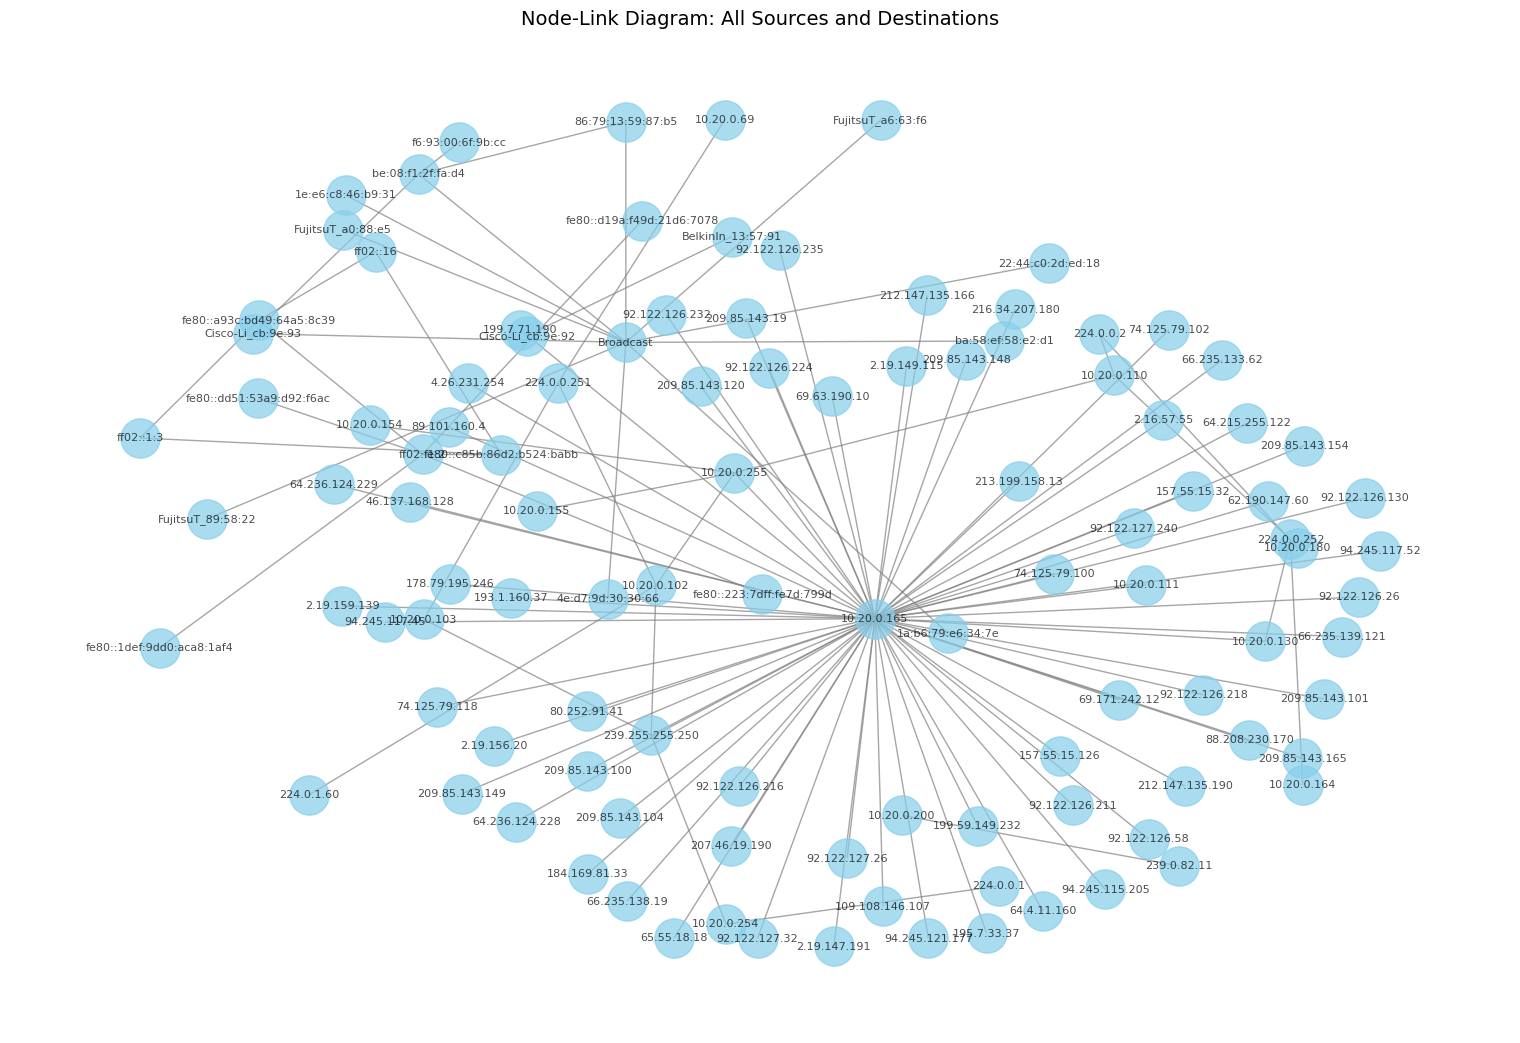

In [49]:
##### old layout , without filtering ######
import pandas as pd 

import networkx as nx 

import matplotlib.pyplot as plt 

  

# Step 1: Build your graph 

G = nx.from_pandas_edgelist(data, 'Source', 'Destination') 

  

# Step 2: Create a 2D layout for simplicity 

pos = nx.spring_layout(G, k=1, iterations=100)  # Increase 'k' for better spacing 

  

# Step 3: Visualize the graph 

plt.figure(figsize=(15, 10))  # Larger figure size for better clarity 

nx.draw( 

    G, 

    pos, 

    with_labels=True,  # Keep labels to identify nodes 

    node_size=800,  # Similar node size to the filtered version 

    node_color="skyblue", 

    edge_color="gray", 

    font_size=8,  # Reduce font size slightly for larger datasets 

    alpha=0.7,  # Transparency for overlapping edges 

) 

plt.title('Node-Link Diagram: All Sources and Destinations', fontsize=14) 

plt.show() 

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [105]:
# # get a list of unique protocol values 
# unique_protocols = data['Protocol'].unique()


# # Create a  new column for each unique protocol
# for protocol in unique_protocols:
#     #True if the protocol matches the column name , else False 
#     data[protocol] = data['Protocol'] == protocol 
   
    
# #select columns to be printe d for output
# output_data = data[['Protocol']+ list(unique_protocols)]



# #display the updated dataframe with unique protocol columns ( original + added columns )
# #print(data.head(5))


# #display the updated Dataframe
# print(output_data.head(5))




from IPython.display import HTML
unique_protocols = data['Protocol'].unique()

for protocol in unique_protocols:
    data[protocol] = data['Protocol'] == protocol 


#Display the updated dataframe
HTML(data.head().to_html())



# ##### New Answer #### 

# # Step 1: Get unique protocol values 

# unique_protocols = data['Protocol'].unique() 

  

# # Step 2: Create a column for each protocol 

# for protocol in unique_protocols: 

#     data[protocol] = data['Protocol'] == protocol  # True if the protocol matches, otherwise False 

  

# # Display the updated DataFrame 

# print(data.head()) 
# data['Protocol'].unique()



# # use to.html()





##mohamad


from IPython.display import HTML
unique_protocols = data['Protocol'].unique()

for protocol in unique_protocols:
    data[protocol] = data['Protocol'] == protocol 


#Display the updated dataframe
HTML(data.head().to_html())



,Time,Source,Destination,Protocol,Length,Info,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1460 SACK_PERM,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 Len=0 MSS=1430 SACK_PERM",True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,True,False,False,False,False,False,False,False,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

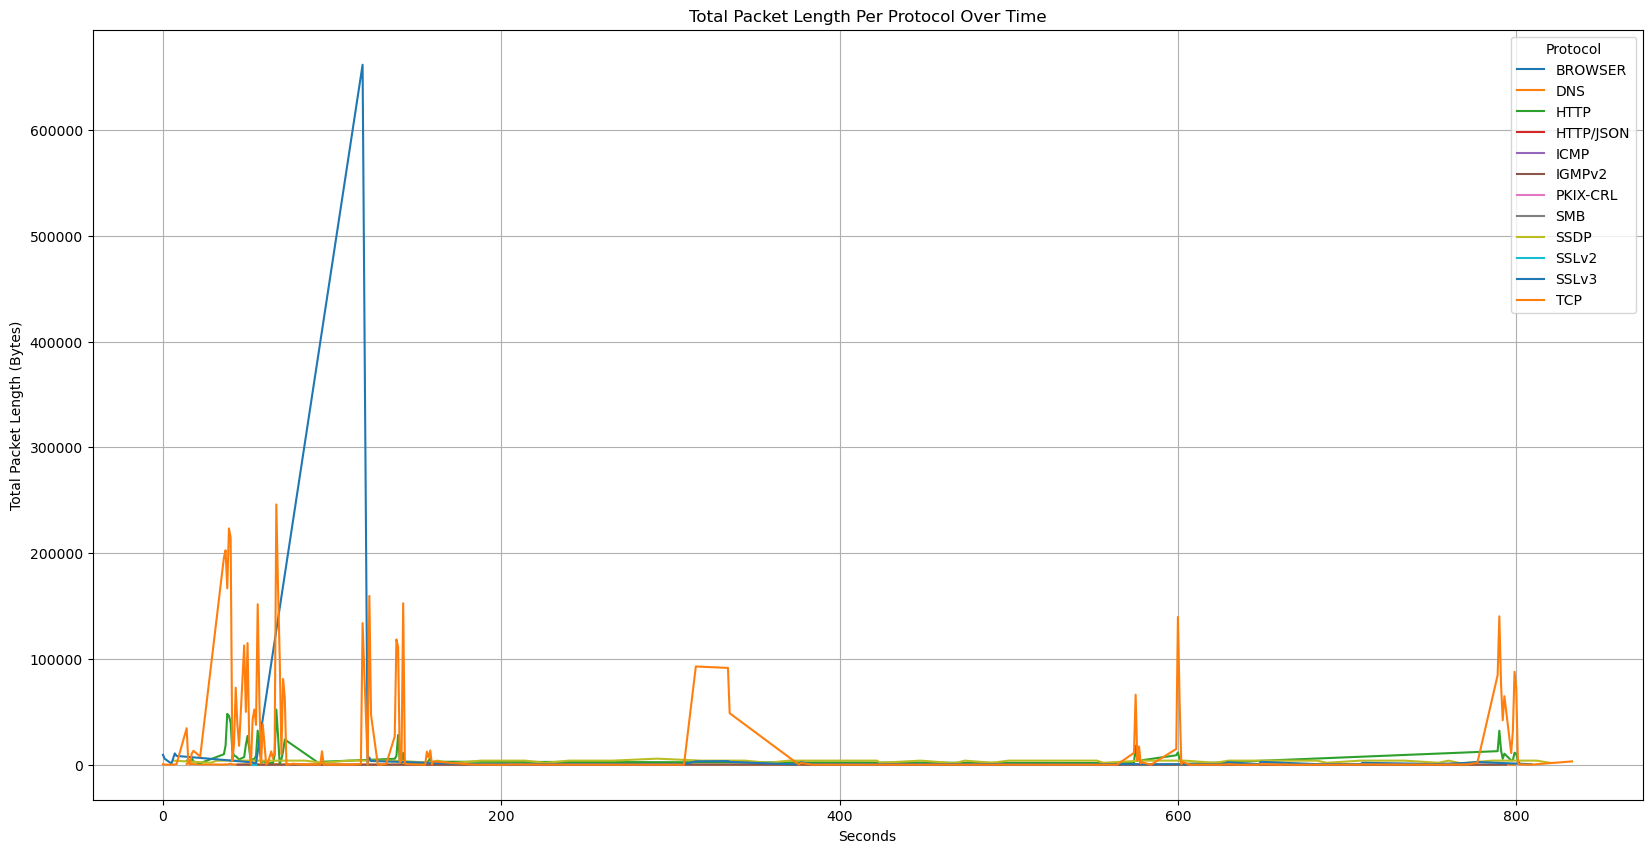

In [107]:


# import pandas as pd 
# import matplotlib.pyplot as plt


#data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Part - 1 /packet-capture3.csv')

# convert time to whole seconds 
data['Whole_Seconds'] = data['Time'].astype(int)


#Group by Protocol and Seconds, and calculate the total packets 
grouped_data = data.groupby(['Protocol', 'Whole_Seconds']) ['Length'].sum().reset_index()


#Creting a multi-line Chart 
plt.figure(figsize =(20,10))


# get a list of unique protocols 
protocols = grouped_data['Protocol'].unique()


# plot the data for each unique protocol 
for protocol in protocols:
    #filter data for current protocol 
    protocol_data = grouped_data[grouped_data['Protocol'] == protocol]
    
    #plot the line for this protocol 
    plt.plot(protocol_data['Whole_Seconds'], protocol_data['Length'], label = protocol )
    
    
    
#labels, title ande legend (for colors )
plt.xlabel("Seconds")
plt.ylabel("Total Packet Length (Bytes)")      #
plt.title("Total Packet Length Per Protocol Over Time")
plt.legend(title= "Protocol") 
plt.grid(True)
plt.show()

In [109]:
#Wrong very wrong
# ########## New answer - activity 6 #####33


# import matplotlib.pyplot as plt 

  

# # Step 1: Group the data by "Seconds" and sum the protocol columns 

# protocol_columns = data.columns[7:]  # All protocol columns (starting after the original columns) 

# packets_per_second = data.groupby('Seconds')[protocol_columns].sum() 

  

# # Step 2: Create the figure for the line plot 

# plt.figure(figsize=(20, 5))  # Match the style of the activity example 

  

# # Step 3: Plot each protocol as a separate line 

# for protocol in protocol_columns: 

#     plt.plot( 

#         packets_per_second.index,  # x-axis: Seconds 

#         packets_per_second[protocol],  # y-axis: Total packets for this protocol 

#         label=protocol  # Add protocol name to the legend 

#     ) 

  

# # Step 4: Customize the chart 

# plt.title('Total Number of Packets Per Protocol Over Time', fontsize=14) 

# plt.xlabel('Seconds', fontsize=12) 

# plt.ylabel('Total Packets Per Protocol', fontsize=12) 

# plt.legend(title='Protocols', fontsize=10, loc='upper left')  # Add a legend with title 

# plt.grid(True)  # Add gridlines for better readability 

  

# # Step 5: Show the plot 

# plt.show() 



#wrong
# # ANSWER
# ######### ADD YOUR CODE HERE ##########

# import matplotlib.pyplot as plt

# # Step 1: Group the data by "Seconds" and sum the protocol columns
# protocol_columns = data.columns[7:]  # Protocol columns start at index 7
# packets_per_second = data.groupby('Seconds')[protocol_columns].sum()

# # Step 2: Plot lines for each protocol
# plt.figure(figsize=(15, 8))  # Adjust figure size for readability
# for protocol in protocol_columns:
#     plt.plot(
#         packets_per_second.index,  # x-axis: Seconds
#         packets_per_second[protocol],  # y-axis: Total packets for the protocol
#         label=protocol  # Label for legend
#     )

# # Step 3: Customize chart
# plt.title('Total Number of Packets Per Protocol Over Time', fontsize=16)
# plt.xlabel('Seconds', fontsize=12)
# plt.ylabel('Total Packets Per Protocol', fontsize=12)
# plt.legend(title="Protocols", fontsize=10)  # Add legend
# plt.grid(True)  # Add gridlines for readability
# plt.show()


### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

### Key Findings of Each Plot (inc. Standout Features ) Justification in the context of a security scenario. 

#### 1. Line Chart


#### 2. Bar Chart 



#### 3. Scatter Chart 



#### 4. Node-Link Diagram 


#### 5. Columns for each protocol 



#### 6. Muli-line Chart 


###







In [19]:
# I dont really know what to write in here 